In [139]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from ipywidgets import interact, IntSlider, fixed, FloatSlider
import matplotlib.pyplot as plt

In [140]:
file = pd.read_csv('Alpha_bank.csv')
file.info()
file = file[::50]
file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30477 entries, 0 to 30476
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30477 non-null  int64 
 1   Job             30477 non-null  object
 2   Marital_Status  30477 non-null  object
 3   Education       30477 non-null  object
 4   Default_Credit  30477 non-null  object
 5   Housing_Loan    30477 non-null  object
 6   Personal_Loan   30477 non-null  object
 7   Subscribed      30477 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,housemaid,married,Primary_Education,no,no,no,no
50,33,unemployed,married,Secondary_Education,no,no,no,no
100,57,management,married,Tertiary_Education,no,no,no,no
150,54,management,divorced,Tertiary_Education,no,no,no,no
200,52,technician,married,Secondary_Education,no,yes,no,no
...,...,...,...,...,...,...,...,...
30250,27,student,single,Secondary_Education,no,no,no,no
30300,54,services,divorced,Secondary_Education,no,yes,yes,yes
30350,21,student,single,Secondary_Education,no,no,no,yes
30400,33,admin.,married,Tertiary_Education,no,yes,no,yes


In [141]:
def job(x):
  if x == 'housemaid':
      return 0
  elif x == 'services':
      return 1
  elif x=='admin.':
    return 2
  elif x=='technician':
    return 3
  elif x=='blue-collar':
    return 4
  elif x=='unemployed':
    return 5
  elif x=='retired':
    return 6
  elif x=='enterpreneur':
    return 7
  elif x=='management':
    return 8
  elif x=='self_employed':
    return 9
  elif x=='student':
    return 10
  else:
      return -1
def marital_status(x):
  if x == 'married':
      return 0
  elif x == 'divorced':
      return 1
  elif x=='single':
    return 2
  else:
      return -1
def education(x):
  if x == 'Primary_Education':
      return 0
  elif x == 'Secondary_Education':
      return 1
  elif x=='Professional_Education':
    return 2
  elif x=='Tertiary_Education':
    return 3
  else:
    return -1
def default_credit(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1  
    else:
        return -1
def housing_loan(x):
  if x == 'no':
      return 0
  elif x == 'yes':
      return 1
  else:
      return -1
def personal_loan(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
def subscribed(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
file['Job'] = file['Job'].apply(job)
file['Marital_Status'] = file['Marital_Status'].apply(marital_status)
file['Education'] = file['Education'].apply(education)
file['Default_Credit'] = file['Default_Credit'].apply(default_credit)
file['Housing_Loan'] = file['Housing_Loan'].apply(housing_loan)
file['Personal_Loan'] = file['Personal_Loan'].apply(personal_loan)
file['Subscribed'] = file['Subscribed'].apply(subscribed)

In [142]:
file_new = file.columns.tolist()
target = file_new.pop(3)
X = file[file_new]
y = file[target]

In [143]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size = 0.15)

<function matplotlib.pyplot.show>

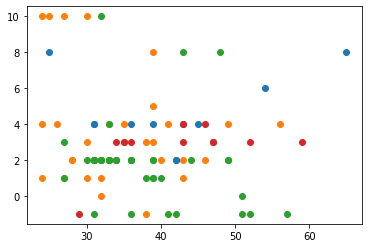

In [144]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
for i in y.unique():
    plt.scatter(x_test["Age"][y_pred == i], x_test['Job'][y_pred == i])
plt.show

In [145]:
def calc_acc(y_pred, y_test):
    acc = 0
    for i,j in zip(y_pred, y_test):
        if i == j:
            acc += 1 
    acc /=len(y_test)
    return acc
calc_acc(y_pred, y_test)

0.391304347826087

In [146]:
def calc_prec(y_pred, y_test):
    prec = 0
    rec = 0
    for i,j in zip(y_pred, y_test):
        if i == j and i == 2:
            prec+=1 
        if i != j and i == 2:
            rec += 1 
    prec /= (prec + rec)
    return prec
calc_prec(y_pred, y_test)

0.2727272727272727

In [147]:
def calc_recall(y_pred, y_test):
    prec = 0
    recall = 0
    for i,j in zip(y_pred, y_test):
        if i == j and i == 2:
            recall += 1
        if i != j and i == 2:
            prec += 1 
    recall /= (recall + prec)
    return recall
calc_recall(y_pred, y_test)

0.2727272727272727

In [148]:
def neighbours (n_neighbors=3):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    return calc_acc(y_pred, y_test)
interact(neighbours, n_neighbors=IntSlider(min=1, max=15, step=1))

interactive(children=(IntSlider(value=1, description='n_neighbors', max=15, min=1), Output()), _dom_classes=('…

<function __main__.neighbours>

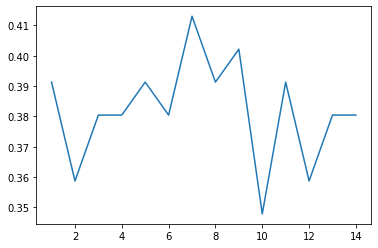

In [149]:
pr2=[]
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(x_train, y_train)
    y_hat2=knn.predict(x_test)
    pr2.append(calc_acc(y_hat2, y_test))
plt.plot(range(1, 15), pr2)

In [150]:
cross = []
g_acc = 0
for i in range(0,5):
    X_train, X_test, Y_train, Y_test = train_test_split(file, y)
    acc = 0
    for k in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean').fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        if calc_acc(y_pred, y_test) > acc:
            acc = calc_acc(y_pred, y_test)
            mod = knn
            if acc > g_acc:
                g_acc = acc
    cross.append([mod,acc])
for i in range(0,5):
    if cross[i][1] == g_acc:
        print(cross[i])
        
cross

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform'), 0.43478260869565216]


[[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                       weights='uniform'), 0.3804347826086957],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                       weights='uniform'), 0.43478260869565216],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                       weights='uniform'), 0.2717391304347826],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                       weights='uniform'), 0.391304347826087],
 [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                       metric_params=None, n_jobs=None, n_neighbo